In [154]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from datetime import datetime
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [155]:
# Путь к файлу
path_to_file = 'time_messagees.txt'

# Считывается файл
df = pd.read_csv(path_to_file, delimiter=',', header = None, names = ['Time','Amount of messages'])
# Данные в столбце Time преобразуются в формат timedelta для последующего вычисления общего количества секунд
#для обучения модели
df['Time'] = pd.to_timedelta(df['Time'])
df['Time'] = df['Time'].dt.total_seconds()
#Выводится датафрейм
df.head(80000)

,Time,Amount of messages
0,0.0,0.0
1,1.0,1.0
2,2.0,0.0
3,3.0,6.0
4,4.0,7.0
...,...,...
79995,79995.0,4.0
79996,79996.0,1.0
79997,79997.0,6.0
79998,79998.0,3.0


In [156]:
# Проверяется, есть ли строки  с нулевыми данными
df.info()
#Т.к. в столбце Amount of messages хранится количество сообщений, что не может быть не целочисленными значением,
#эти данные приводятся к типу int
df['Amount of messages'] = df['Amount of messages'].astype(int)
# то же самое действие производится с столбцом Time
df['Time'] = df['Time'].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86396 entries, 0 to 86395
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time                86396 non-null  float64
 1   Amount of messages  86396 non-null  float64
dtypes: float64(2)
memory usage: 1.3 MB


In [157]:
df.info() # Проверка смены типа данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86396 entries, 0 to 86395
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Time                86396 non-null  int32
 1   Amount of messages  86396 non-null  int32
dtypes: int32(2)
memory usage: 675.1 KB


In [158]:
# Создаётся модель линейной регрессии
model = LinearRegression()

# данные стандартизируются
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(np.array( df['Time']).reshape(-1,1))
y_scaled = scaler.fit_transform(np.array(df['Amount of messages']).reshape(-1, 1))

# создаются тренировочные и валидационные выборки
X_train, X_valid, y_train, y_valid = train_test_split(x_scaled,y_scaled,test_size = 0.25, random_state = 0)

# обучается модель
model = LinearRegression()
model.fit(X_train, y_train)

# предсказываются значения
pred = model.predict(X_valid)


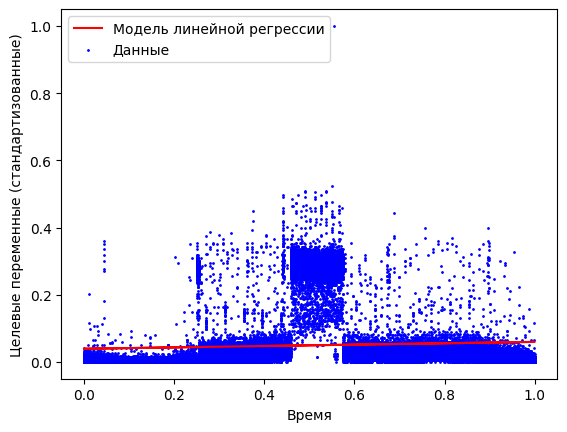

In [159]:
# Построение графика
plt.plot(X_valid, pred, label='Модель линейной регрессии', color = 'r')
plt.scatter(x_scaled, y_scaled, color='b', label='Данные', s = 1)
plt.xlabel('Время')
plt.ylabel('Целевые переменные (стандартизованные)')
plt.legend()
plt.show()

По данному графику можно сделать вывод, что модель достаточно хорошо предсказывает значения, однако она не учитывает выбросы, а также 
временные спады кол-ва сообщений, судя по графику прямой, можно сказать, что количество сообщений линейно возрастает со временем

In [160]:
# вывод mse 
print(mean_squared_error(y_valid, pred))

0.00801630634994638


По данному показателю значения средней квадратичной ошибки можно сделать вывод,что модель достаточно точно предсказывает значения, 
однако одной лишь метрики MSE может быть мало для оценки качества предсказания модели